In [1]:
# library
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


# Fashion MNIST

In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,  # do we want the training dataset
    download=False,
    transform=ToTensor(),
    target_transform=None  # how do we want to transform the label/target
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=False,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_data_to_idx = train_data.class_to_idx
class_data_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

# visulaize data

Image shape: torch.Size([1, 28, 28])


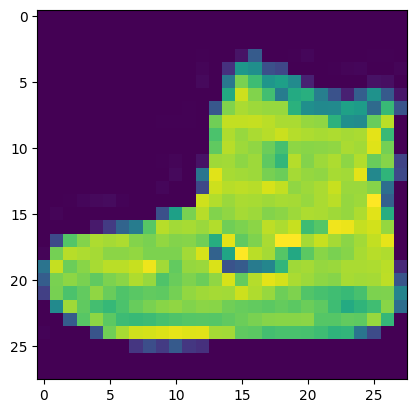

In [9]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())

Image shape: torch.Size([1, 28, 28])


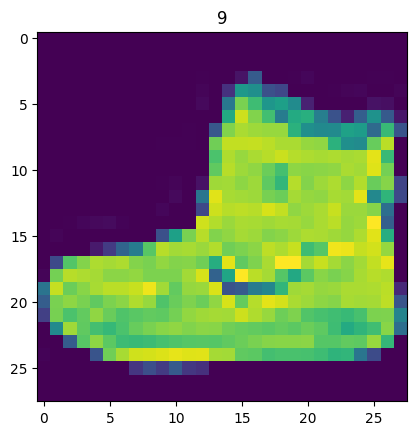

In [10]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

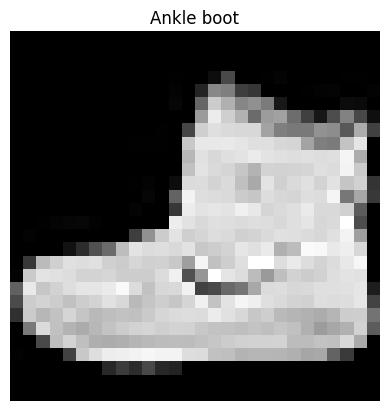

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

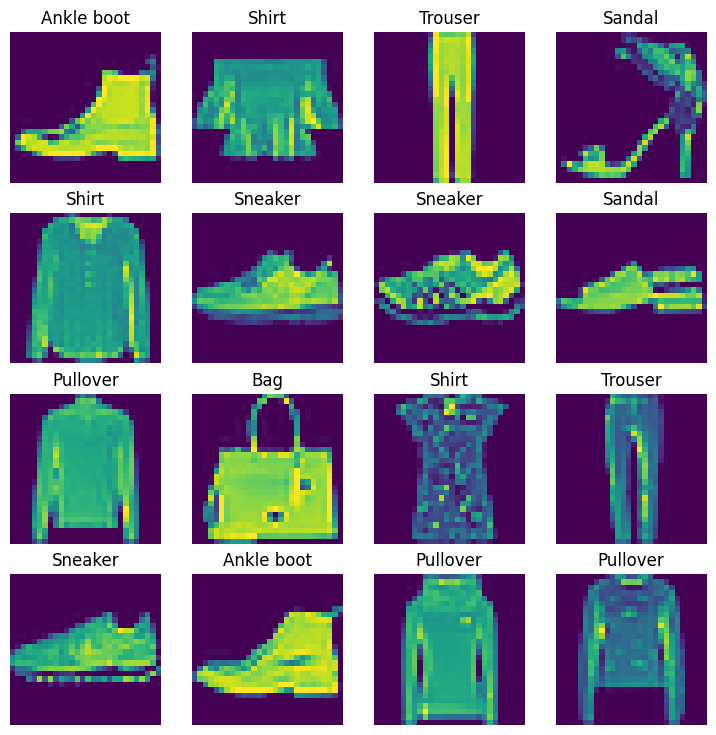

In [12]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, 4 * 4 + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze())
    plt.title(class_names[label])
    plt.axis(False)

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

# why batches
### better for computation
### it give more chances to update model per epoch

In [14]:
from torch.utils.data import DataLoader

batch_size = 32

train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x26ef099acd0>,
 <torch.utils.data.dataloader.DataLoader at 0x26ef056d810>)

In [15]:
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"len train: {len(train_dataloader)}")
print(f"len test: {len(test_dataloader)}")


DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x0000026EF099ACD0>, <torch.utils.data.dataloader.DataLoader object at 0x0000026EF056D810>)
len train: 1875
len test: 313


In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

# Model

In [17]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)  # perform forward pass

print(f"shape before flattening {x.shape}")
print(f"shape after flattening {output.shape}")

shape before flattening torch.Size([1, 28, 28])
shape after flattening torch.Size([1, 784])


In [18]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [19]:
from torch import nn


class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28 * 28,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand(size=(1, 1, 28, 28))
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [22]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

# time

In [23]:
from timeit import default_timer as timer


def print_train_time(start: float, end: float, device: str = None):
    total_time = end - start
    print(f"Train time on device {device} is {total_time:.3f} seconds")
    return total_time

In [24]:
start_time = timer()
#some code
end_time = timer()
print_train_time(start_time, end_time, device=next(model_0.parameters()).device)

Train time on device cpu is 0.000 seconds


4.0499959141016006e-05

In [25]:
from tqdm.auto import tqdm

for i in tqdm(range(10000)):
    pass

  0%|          | 0/10000 [00:00<?, ?it/s]

In [26]:
len(train_dataloader), len(train_dataloader.dataset)  # number of batches  # number of data

(1875, 60000)

In [27]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_loss = 0
    for batch, (X, y) in tqdm(enumerate(train_dataloader)):
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader.dataset)

    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test_Loss: {test_loss:.4f}, test_acc: {test_acc:.2f}%")

train_time_end_on_cpu = timer()

total_train_time = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu,
                                    str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----


0it [00:00, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.0184 | Test_Loss: 0.5095, test_acc: 82.04%
Epoch: 1
-----


0it [00:00, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.0149 | Test_Loss: 0.4799, test_acc: 83.20%
Epoch: 2
-----


0it [00:00, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.0142 | Test_Loss: 0.4766, test_acc: 83.43%
Train time on device cpu is 40.164 seconds


In [28]:
def eval_model(model: torch.nn.Module, data_loder: torch.utils.data.dataloader, loss_fn: torch.nn.Module, accuracy_fn,
               device: str):
    """returning a dictionary containing the results of model predicting on dataloader"""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loder):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))
        loss /= len(data_loder)
        acc /= len(data_loder)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


model_0_results = eval_model(model=model_0, data_loder=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn,
                             device="cpu")
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu"


class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = FashionMNISTModelV1(784, 10, len(class_names)).to(device)

In [31]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)


In [32]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: str = "cpu"):
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss is {train_loss:.4f} | Train accuracy is {train_acc:.2f}%")

In [33]:
def test_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn,
              device: str = "cpu"):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss
            test_acc += accuracy_fn(y, y_pred.argmax(dim=1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss is {test_loss:.4f} and Test Accuracy is {test_acc:.2f}%\n")

In [34]:
epochs = 3
model_1 = model_1.to(device)
from timeit import default_timer as timer

start_time = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch} ------")
    train_step(model=model_1, data_loader=train_dataloader, loss_fn=nn.CrossEntropyLoss(),
               optimizer=torch.optim.SGD(model_1.parameters(), lr=0.1), accuracy_fn=accuracy_fn, device=device)

    test_step(model=model_1, data_loader=test_dataloader, loss_fn=nn.CrossEntropyLoss(), accuracy_fn=accuracy_fn,
              device=device)
end_time = timer()
total_train_time_gpu = print_train_time(start_time, end_time, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0 ------
Train loss is 1.0588 | Train accuracy is 62.19%
Test Loss is 0.9951 and Test Accuracy is 64.13%

Epoch 1 ------
Train loss is 0.9133 | Train accuracy is 66.40%
Test Loss is 0.9051 and Test Accuracy is 66.86%

Epoch 2 ------
Train loss is 0.8798 | Train accuracy is 67.25%
Test Loss is 0.8949 and Test Accuracy is 66.47%

Train time on device cuda is 44.991 seconds


In [35]:
total_train_time

40.16440720006358

In [36]:
model_1_results = eval_model(model=model_1, data_loder=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn,
                             device="cuda")

  0%|          | 0/313 [00:00<?, ?it/s]

In [37]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [38]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8948529958724976,
 'model_acc': 66.47364217252397}

In [39]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2))
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 49, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        return self.classifier(x)

In [40]:
image.shape

torch.Size([1, 28, 28])

In [41]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

In [42]:
model_2.state_dict()


OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [43]:
torch.manual_seed(42)
images = torch.rand(size=(32, 3, 64, 64))
test_image = images[0]
print(images.shape)
print(test_image.shape)


torch.Size([32, 3, 64, 64])
torch.Size([3, 64, 64])


In [44]:
print(test_image)

tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
         [0.7021, 0.5967, 0.7744,  ..., 0.8485, 0.4520, 0.

In [45]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)
# print(test_image.shape)
conv_layer(test_image).shape

torch.Size([10, 62, 62])

In [46]:
print(test_image.shape)
maxpool = nn.MaxPool2d(kernel_size=2)
maxpool(conv_layer(test_image)).shape

torch.Size([3, 64, 64])


torch.Size([10, 31, 31])

In [47]:
rand_image_tensor = torch.rand(size=(1, 28, 28))

In [48]:
model_2(rand_image_tensor.unsqueeze(dim=0)).argmax(dim=1)

tensor([2])

In [49]:
class_names[2]

'Pullover'

In [50]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [51]:
torch.manual_seed(42)

from timeit import default_timer as timer

start_time = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch} ----")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device="cpu")
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device="cpu")

end_time = timer()
total_train_time_model2 = print_train_time(start_time, end_time, "cpu")

model_2_results = eval_model(model=model_2,
                             data_loder=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device="cpu")
    

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0 ----
Train loss is 0.5982 | Train accuracy is 78.34%
Test Loss is 0.3965 and Test Accuracy is 85.71%

Epoch 1 ----
Train loss is 0.3614 | Train accuracy is 86.98%
Test Loss is 0.3592 and Test Accuracy is 86.76%

Epoch 2 ----
Train loss is 0.3244 | Train accuracy is 88.30%
Test Loss is 0.3293 and Test Accuracy is 88.16%

Train time on device cpu is 144.244 seconds


  0%|          | 0/313 [00:00<?, ?it/s]

In [52]:
model_2_results = eval_model(model_2,test_dataloader,loss_fn,accuracy_fn,"cpu")

  0%|          | 0/313 [00:00<?, ?it/s]

In [53]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.894853,66.473642
2,FashionMNISTModelV2,0.329321,88.158946


In [54]:
compare_results["time"] = [total_train_time,1, total_train_time_model2]
compare_results

,model_name,model_loss,model_acc,time
0,FashionMNISTModelV0,0.476639,83.426518,40.164407
1,FashionMNISTModelV1,0.894853,66.473642,1.000000
2,FashionMNISTModelV2,0.329321,88.158946,144.243773


<Axes: ylabel='model_name'>

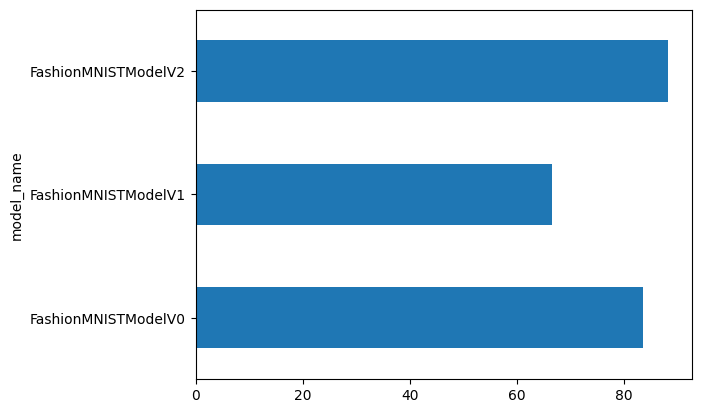

In [62]:
compare_results = compare_results.set_index("model_name")
compare_results["model_acc"].plot(kind="barh")

In [63]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:str):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)
            

In [98]:
import  random
test_sample = []
test_label = []
for sample, label in random.sample(list(test_data), k=9):
    test_sample.append(sample)
    test_label.append(label)
test_sample

[tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078,
           0.0000, 0.0000, 0.5490, 0.7412, 

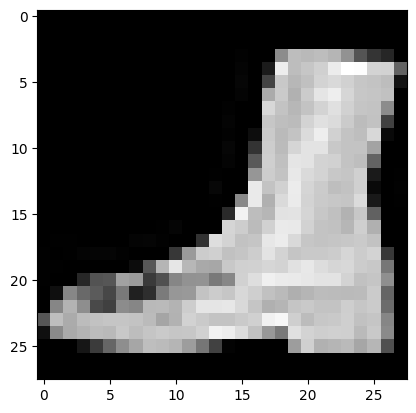

In [99]:
plt.imshow(test_sample[0].squeeze(), cmap="gray")

In [100]:
pred_prob = make_predictions(model=model_2, data =test_sample, device="cpu")
pred_prob[:4]

tensor([[8.7903e-06, 2.1773e-07, 5.4032e-07, 8.8815e-08, 9.9738e-08, 5.5558e-03,
         1.4263e-05, 1.1074e-04, 3.5629e-03, 9.9075e-01],
        [9.4000e-01, 1.1240e-04, 4.4307e-03, 4.7542e-03, 2.4786e-04, 3.3217e-05,
         5.0335e-02, 7.3008e-06, 7.3549e-05, 4.8427e-06],
        [1.4845e-06, 1.2398e-06, 1.0296e-06, 8.8412e-07, 3.7814e-06, 3.2567e-03,
         3.2024e-07, 9.9657e-01, 9.0521e-05, 7.8416e-05],
        [9.8606e-04, 4.1379e-06, 1.3241e-02, 8.4904e-04, 1.9314e-01, 5.2950e-05,
         7.9075e-01, 2.1630e-07, 9.8248e-04, 3.6984e-07]])

In [101]:
pred_classes = pred_prob.argmax(dim=1)
pred_classes

tensor([9, 0, 7, 6, 1, 5, 8, 6, 1])

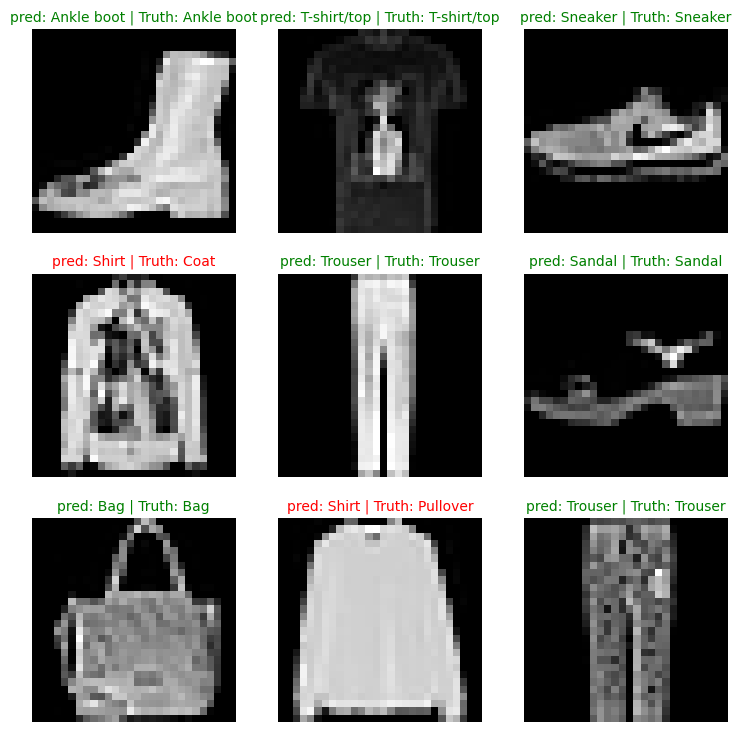

In [102]:
plt.figure(figsize=(9,9))
n_rows = 3
n_cols = 3
for i, sample in enumerate(test_sample):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_label[i]]
    title_text = f"pred: {pred_label} | Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
        
    plt.axis(False)

In [107]:
y_pred


tensor([[ -4.2884,  -4.5163,  -2.8663,  -2.8026,  -4.5364,  10.6251,  -3.2177,
           5.2487,   3.1904,   3.6958],
        [  4.0112,  17.3848,   2.3789,   7.3795,   3.8355, -16.1455,  -3.0860,
           0.4360,  -4.1143,  -3.8946],
        [  2.7866,  -2.3651,   4.1910,   4.4483,   1.6574,  -2.5093,   5.4787,
          -7.0523,   0.5839, -10.1702],
        [ -0.7734,  -2.9671,   1.9678,   0.6928,   2.7401,   0.7660,  -0.2681,
          -1.9020,  10.3998,  -8.5007],
        [  3.2206,   1.0172,   7.0490,   0.7800,  11.2269,  -6.9325,   8.6063,
         -10.2186,   0.4854, -12.4510],
        [ -3.7998,  -1.7368,  -2.7868,  -0.5707,  -3.0465,   5.2985,  -3.0114,
           7.2965,   2.3428,  -0.2321],
        [ -3.1064,  -2.8652,  -3.0730,  -2.4402,  -3.2373,   4.7686,  -1.5414,
           5.4224,   1.8543,   6.1236],
        [  3.6788,  -1.5608,   5.4943,   1.0448,   4.0298,  -3.9816,   4.8922,
          -6.2331,   1.9169,  -8.0682],
        [  5.5474,  -1.8984,   6.7428,   4.2967,

In [110]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
confmat = ConfusionMatrix(task="MULTICLASS",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred, data=test_data.targets)


TypeError: MulticlassConfusionMatrix.update() got an unexpected keyword argument 'data'